In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import umap
from tqdm.notebook import tqdm

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

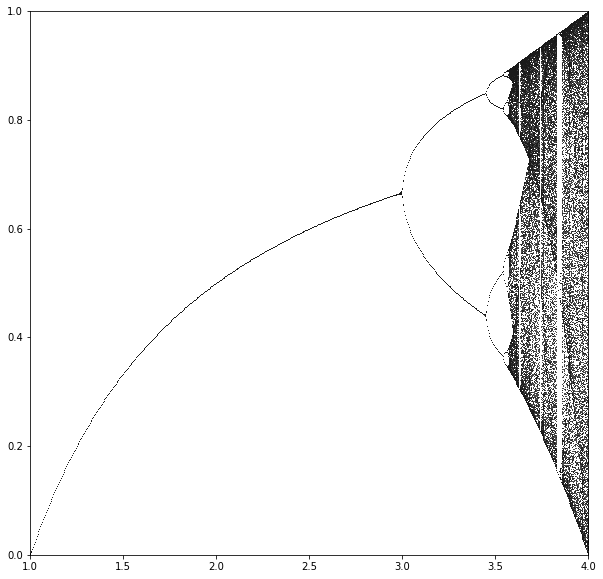

CPU times: user 7.49 s, sys: 592 ms, total: 8.08 s
Wall time: 7.41 s


In [3]:
%%time
eps    = 0.01    # perturbation
u      = 0.0     # dependent variable
u      = u + eps # small perturbation in u
# r is plotted on the x-axis. Different values of r produce very different behaviors. In population dynamics,
# r represents the combined rate of reproduction and starvation.
r      = 0.0
dr     = 0.005
r_list = []      # x-axis values
u_list = []      # y-axis values

while r < 4.0:
    # Skip the first 200 iterations in order to converge to the equilibria.
    for i in range(1, 200):
        u = r*u*(1.0 - u)
    for i in range(1, 500):
        u = r*u*(1.0 - u)
        r_list.append(r)
        u_list.append(u)
    r = r+dr
    u = u+eps

plt.scatter(r_list, u_list, s=1, facecolor='0.1', lw = 0)
plt.axis([1.0, 4.0, 0, 1.0])
plt.show();

In [4]:
df = pd.DataFrame(columns=['r', 'u'])
df['r'] = r_list
df['u'] = u_list
df.tail()

,r,u
399694,4.0,0.359672
399695,4.0,0.921232
399696,4.0,0.290255
399697,4.0,0.824028
399698,4.0,0.580024


2


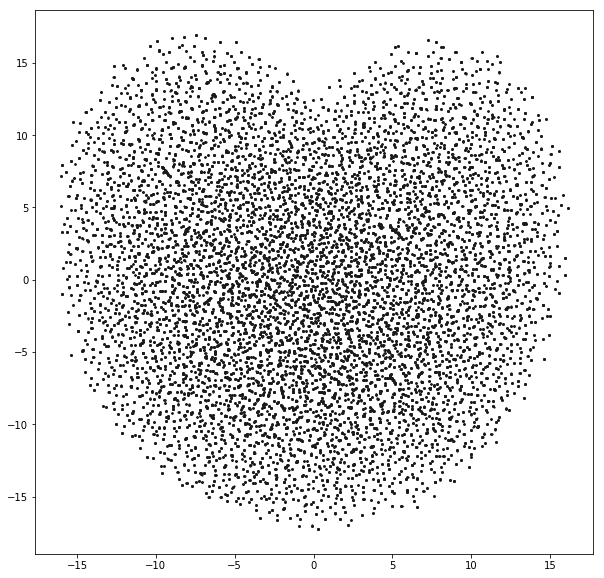

3


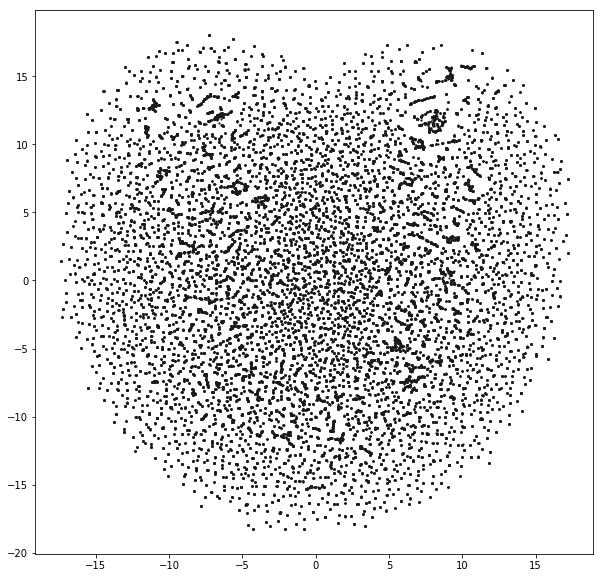

4


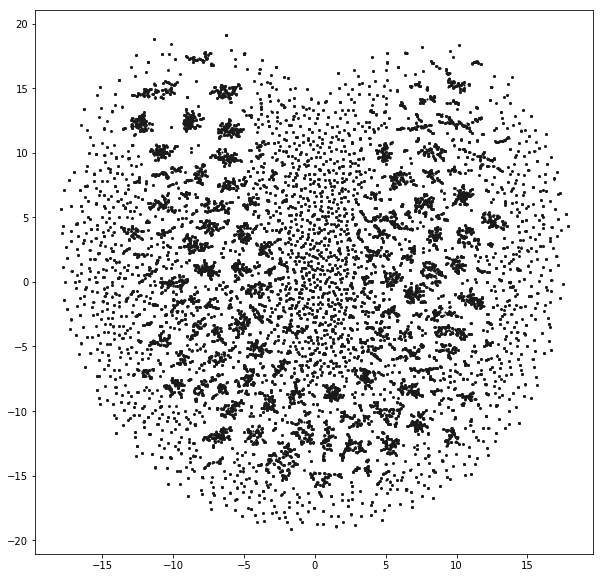

5


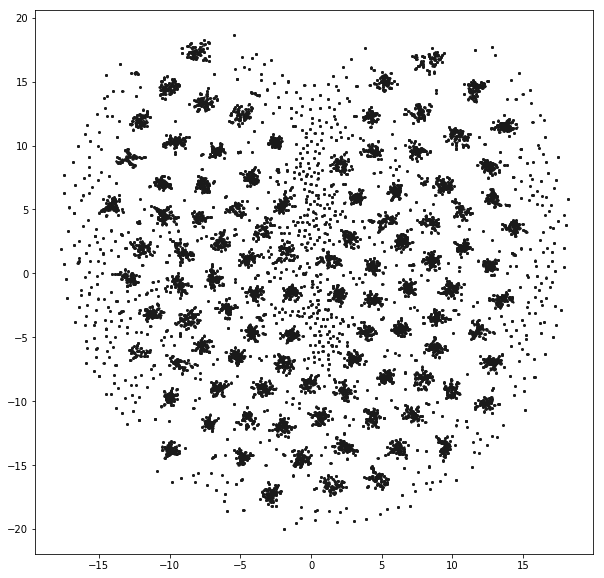

6


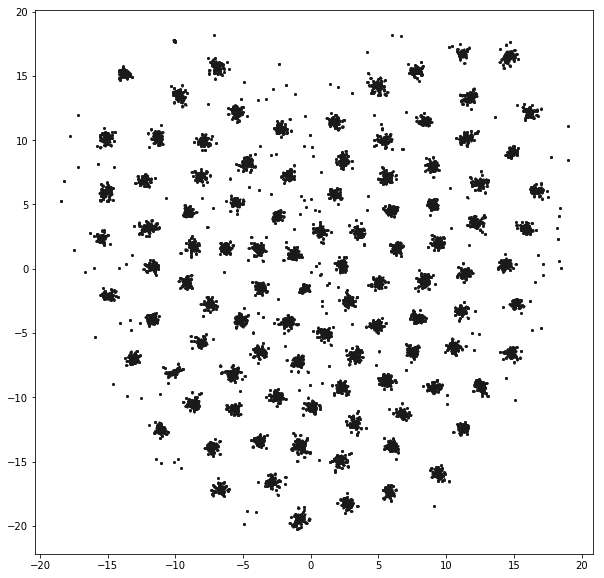

7


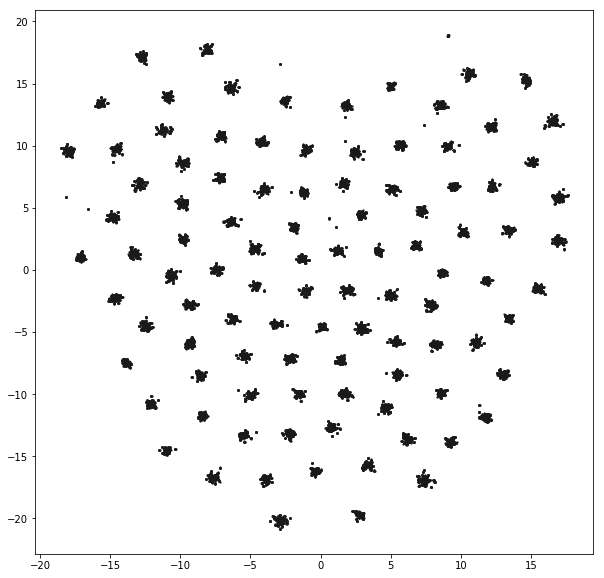

8


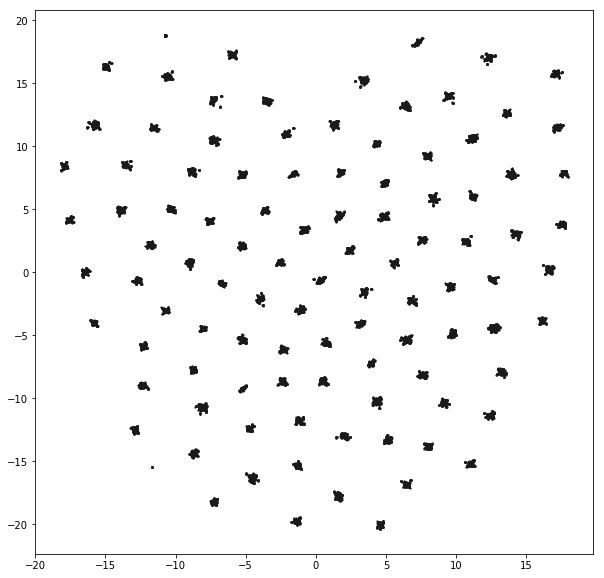

9


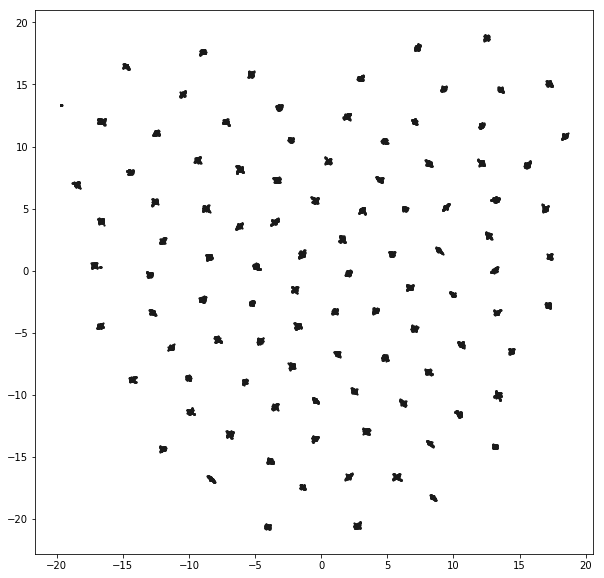

10


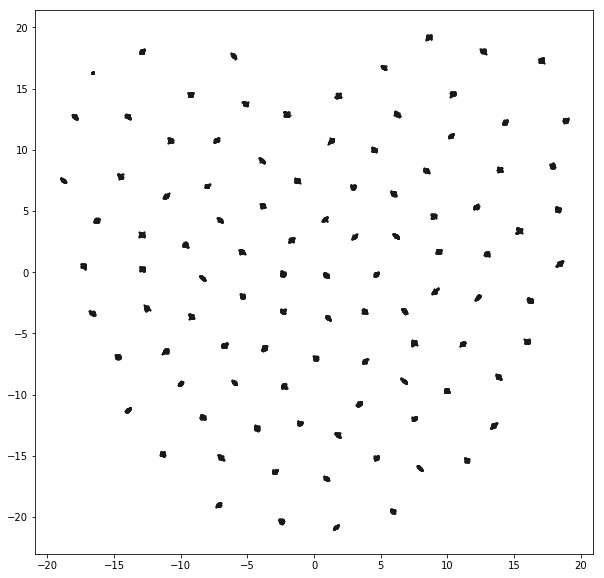

30


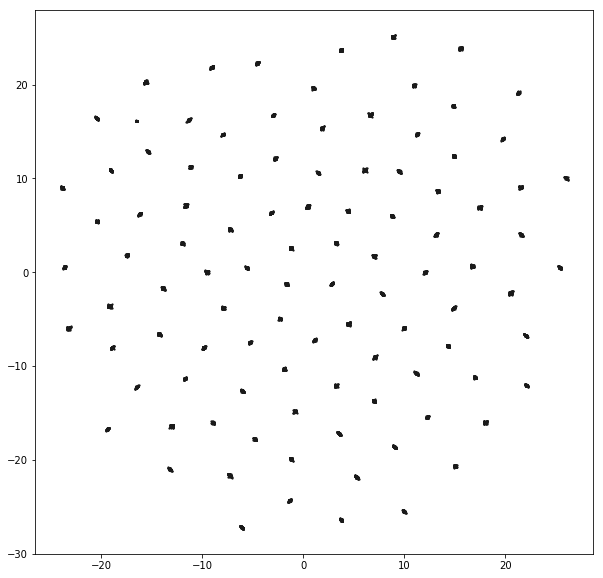

50


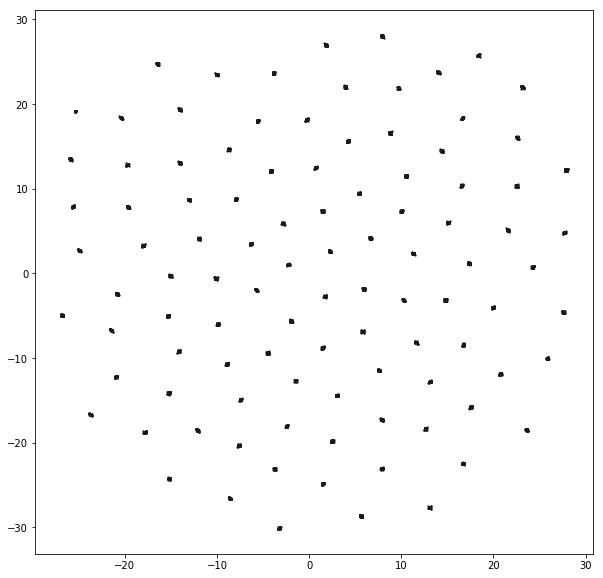

80


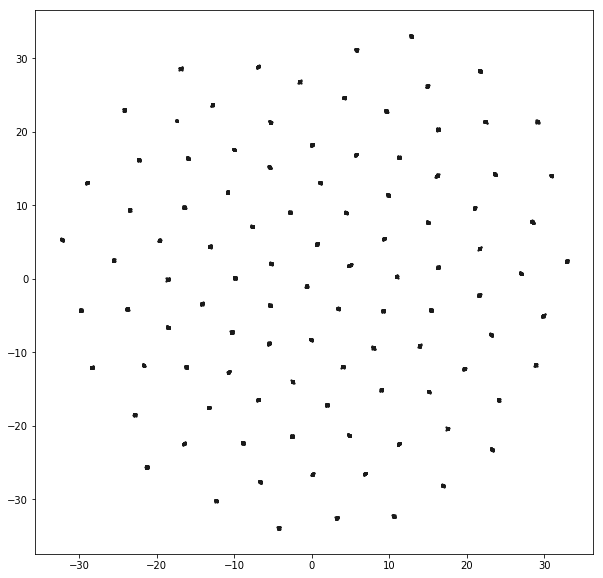

100


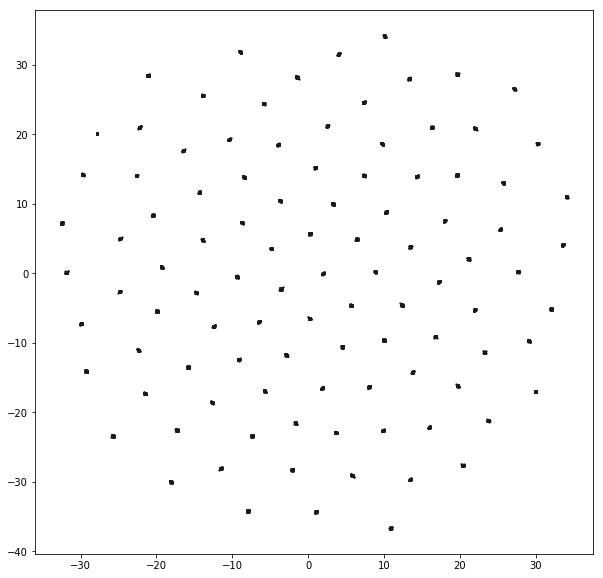

1000


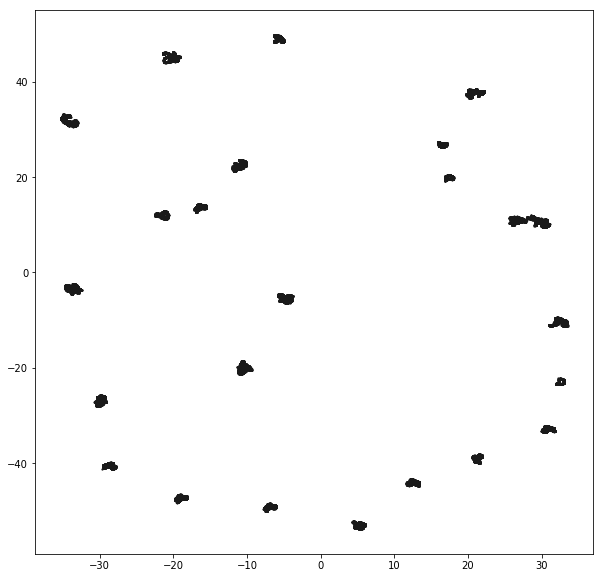

2000


In [ ]:
%%time
for i in tqdm([2, 3, 4, 5, 6, 7, 8, 9, 10, 30, 50, 80, 100, 1000, 2000]):
    print(i)
    _umap = umap.UMAP(n_neighbors=i).fit_transform(df.values[:50000])
    plt.scatter(_umap[:,0], _umap[:,1], s=5, facecolor='0.1', lw = 0)
    plt.show()
#df['UMAP_x'] = _umap[:,0]
#df['UMAP_y'] = _umap[:,1]
#plt.scatter(df['UMAP_x'], df['UMAP_y'], s=1, facecolor='0.1', lw = 0)